In [4]:
import pandas as pd
import glob
import os
import re
import chardet
import json

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)


In [7]:
# NOV_parsed = "/naga/lair0/IoT-local/dataset/idle-dataset-nov/bro_results/"
DEC_parsed = "/home/aniketh/devel/src/IoT-local/results/bro_results/dec_parsed"

# json_files = glob.glob(os.path.join(NOV_parsed, '*.log'))
# json_files.extend(glob.glob(os.path.join(DEV_parsed, '*.log')))

In [14]:
def read_conn_log_files(root_dir):
    data = []
    for device_dir in os.listdir(root_dir):
        device_path = os.path.join(root_dir, device_dir)
        if os.path.isdir(device_path):
            for date_dir in os.listdir(device_path):
                date_path = os.path.join(device_path, date_dir)
                if os.path.isdir(date_path):
                    conn_log_path = os.path.join(date_path, 'conn.log')
                    if os.path.isfile(conn_log_path):
                        with open(conn_log_path, 'r') as file:
                            for line in file:
                                try:
                                    conn_data = json.loads(line.strip())
                                    conn_data.update({"device": device_dir, "date": date_dir})
                                    data.append(conn_data)
                                except json.JSONDecodeError as e:
                                    print(f"Error parsing {conn_log_path}: {e}")

    df = pd.DataFrame(data)
    return df

In [15]:
df = read_conn_log_files(DEC_parsed)

In [17]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,device,date
0,1.672216e+09,C86InY2rSpBAkCdBJ3,fe80::271:47ff:fec0:9193,5353,ff02::fb,5353,udp,dns,15.840736,1839.0,0.0,S0,0,D,7,2175,0,0,echospot,2022-12-28_03.21.11_192.168.10.201
1,1.672216e+09,CQJ7m1kKlxr2X0xbf,192.168.10.201,5353,224.0.0.251,5353,udp,dns,31.845943,2211.0,0.0,S0,0,D,8,2435,0,0,echospot,2022-12-28_03.21.11_192.168.10.201
2,1.672216e+09,C7KNi944pQFmt3xQ51,192.168.10.240,48058,192.168.10.201,55443,tcp,ssl,45.317669,4456.0,3023.0,SF,0,ShADadFf,23,5660,16,3863,echospot,2022-12-28_03.21.11_192.168.10.201
3,1.672216e+09,CEqvja45N7yIUHWshb,192.168.10.201,5353,224.0.0.251,5353,udp,dns,NaN,NaN,NaN,S0,0,D,1,400,0,0,echospot,2022-12-28_03.21.11_192.168.10.201
4,1.672216e+09,CaxLSc4PT1mXsEgMi7,fe80::271:47ff:fec0:9193,5353,ff02::fb,5353,udp,dns,NaN,NaN,NaN,S0,0,D,1,420,0,0,echospot,2022-12-28_03.21.11_192.168.10.201


In [33]:
data = []

for file in json_files:
    with open(file, 'r') as f:
        for line in f:
            # Skip empty lines
            if not line.strip():
                continue

            try:
                content = json.loads(line)
                content['filename'] = os.path.basename(file)  # Add the filename as another field
                data.append(content)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in file {file}: {e}")


In [34]:
df = pd.DataFrame(data)

df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,filename
0,1.667603e+09,CuVHFl2NBXr0Wq7es4,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.210141,308.0,300.0,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...
1,1.667603e+09,CKN3N3WkBkx7b4H6c,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.111334,308.0,300.0,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...
2,1.667603e+09,C4HiuVm3zGsLAOKqk,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.204511,308.0,300.0,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...
3,1.667604e+09,C1kLGM29Y8yBot17wl,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.206640,308.0,300.0,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...
4,1.667604e+09,CcOrE2CO01EskevWa,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.177173,308.0,300.0,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738474,1.672278e+09,CEIzEo0T3hX9YYMHi,192.168.10.220,3,47.74.255.9,3,icmp,NaN,NaN,NaN,NaN,OTH,0,NaN,1,76,0,0,[],yi-camera-2022-12-28_15.58.28_192.168.10.220.log
2738475,1.672278e+09,C7ujHr1cV4HKmyz5ba,192.168.10.220,11727,192.168.10.255,32108,udp,NaN,2.248338,72.0,0.0,S0,0,D,3,156,0,0,[],yi-camera-2022-12-28_15.58.28_192.168.10.220.log
2738476,1.672279e+09,CZWAGlOr3FuUA0KP1,192.168.10.220,68,192.168.10.254,67,udp,dhcp,0.140234,280.0,304.0,SF,0,Dd,1,308,1,332,[],yi-camera-2022-12-28_15.58.28_192.168.10.220.log
2738477,1.672279e+09,CB9G6R3CXg7oEEYcc,192.168.10.220,68,192.168.10.254,67,udp,dhcp,0.235444,280.0,304.0,SF,0,Dd,1,308,1,332,[],yi-camera-2022-12-28_15.58.28_192.168.10.220.log


In [18]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes',
       'resp_pkts', 'resp_ip_bytes', 'device', 'date'],
      dtype='object')

In [7]:
testf = df['filename'][0]

In [11]:
re.split(r'(-\d{4}-\d{2}-\d{2})', testf)[0]

'amazon-plug'

In [12]:
df['device_name'] = df['filename'].apply(lambda x: re.split(r'(-\d{4}-\d{2}-\d{2})', x)[0])

In [13]:
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,filename,device_name
0,1.667603e+09,CuVHFl2NBXr0Wq7es4,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.210141,308.0,...,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...,amazon-plug
1,1.667603e+09,CKN3N3WkBkx7b4H6c,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.111334,308.0,...,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...,amazon-plug
2,1.667603e+09,C4HiuVm3zGsLAOKqk,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.204511,308.0,...,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...,amazon-plug
3,1.667604e+09,C1kLGM29Y8yBot17wl,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.206640,308.0,...,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...,amazon-plug
4,1.667604e+09,CcOrE2CO01EskevWa,192.168.10.234,68,192.168.10.254,67,udp,dhcp,0.177173,308.0,...,SF,0,Dd,1,336,1,328,[],amazon-plug-2022-11-04_15.24.14_192.168.10.234...,amazon-plug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738474,1.672278e+09,CEIzEo0T3hX9YYMHi,192.168.10.220,3,47.74.255.9,3,icmp,NaN,NaN,NaN,...,OTH,0,NaN,1,76,0,0,[],yi-camera-2022-12-28_15.58.28_192.168.10.220.log,yi-camera
2738475,1.672278e+09,C7ujHr1cV4HKmyz5ba,192.168.10.220,11727,192.168.10.255,32108,udp,NaN,2.248338,72.0,...,S0,0,D,3,156,0,0,[],yi-camera-2022-12-28_15.58.28_192.168.10.220.log,yi-camera
2738476,1.672279e+09,CZWAGlOr3FuUA0KP1,192.168.10.220,68,192.168.10.254,67,udp,dhcp,0.140234,280.0,...,SF,0,Dd,1,308,1,332,[],yi-camera-2022-12-28_15.58.28_192.168.10.220.log,yi-camera
2738477,1.672279e+09,CB9G6R3CXg7oEEYcc,192.168.10.220,68,192.168.10.254,67,udp,dhcp,0.235444,280.0,...,SF,0,Dd,1,308,1,332,[],yi-camera-2022-12-28_15.58.28_192.168.10.220.log,yi-camera


In [19]:
df.service = df.service.fillna('unknown')

# df_all = df.dropna(subset=['service'])

In [20]:
df_grouped = df[['service', 'device']].groupby('service').nunique()

In [21]:
df_sorted = df_grouped.sort_values(by='device', ascending=False)

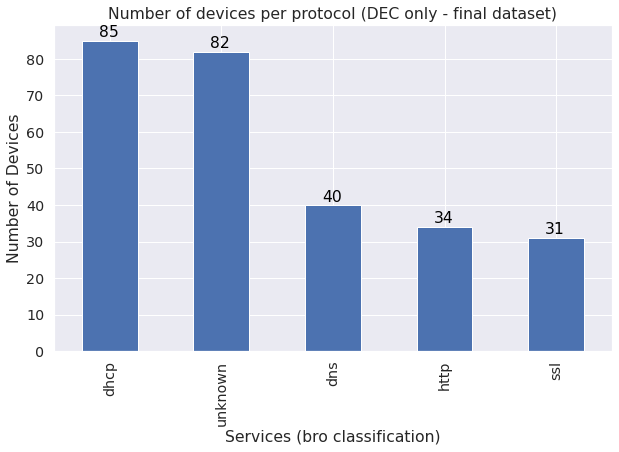

In [24]:
ax = df_sorted.plot(kind='bar', rot=90, figsize=(10, 6), legend=False)
ax.set_xlabel('Services (bro classification)')
ax.set_ylabel('Number of Devices')
ax.set_title('Number of devices per protocol (DEC only - final dataset)')

# Add the numbers on top of each bar
for i, v in enumerate(df_sorted['device']):
    ax.text(i - 0.1, v + 1, str(v), color='black')

plt.show()

In [45]:
len(df[df['filename']=='yi-camera-2022-12-27_15.58.24_192.168.10.220.log'].groupby(['id.orig_h', 'id.resp_h'])

7